<img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png" style="margin: 0 auto"/>

<h1 style="text-align:center;color: red"> Prueba Práctica Unidad 1 </h1>

<ul style="text-align:center;list-style:none">
    <li><strong>Autor: </strong> Jonnathan Oswaldo Matute Curillo</li>
    <li><strong>Maestro: </strong> Diego Quisi</li>
    <li><strong>Materia: </strong> Simulación</li>
    <li><strong>Universidad: </strong> Universidad Politécnica Salesiana</li>
    <li><strong>Carrera: </strong> Ciencias de la computación</li>
</ul>

-----------------

<h2 style="color:yellowgreen">Introducción</h2>

Diseñar y desarrollar un modelo y/o script que permita describir las personas empleadas y desempleadas por año en el Ecuador.

------------------------

<h2 style="color:yellowgreen">Librerias a importar</h2>

**Para lectura y análisis de datos**

In [13]:
import pandas as pd
import numpy as np

from datetime import datetime,timedelta

**Para la realización de gráficas**

In [14]:
import altair as alt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

**Librerias para realizar el modelo de regresión**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

**Librerias para métricas de calidad**

In [16]:
from sklearn.metrics import mean_squared_error

**Mejorar visualización de datos**

In [17]:
pd.options.display.float_format='{:,.2f}'.format
import warnings
warnings.simplefilter("ignore")

-----------------------

<h2 style="color:yellowgreen">Lectura de datos</h2>

En este proceso, realizamos la lectura de los datos que tenemos para poder realizar un análisis. En este caso, tenemos datos de la poblacion, a continuación mostramos la data.

In [80]:
poblacion = pd.read_csv('1.Poblaciones.csv',encoding='latin1', sep=';',skiprows=2)
sectorizacion_empleo = pd.read_csv('4. Sectorización del empleo.csv', sep = ';',encoding='latin1', skiprows = 1)
poblacion = poblacion.drop(poblacion.columns[[8,9,10,11,12,13,14,15,16,17,18]],axis=1)
poblacion.rename(columns ={'Unnamed: 0':'Encuesta','Unnamed: 1':'Periodo','Unnamed: 2':'Indicadores'}, inplace = True)
poblacion

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018
...,...,...,...,...,...,...,...,...
895,ENEMDU*,oct-21,Desempleo Abierto,336.101,291.606,44.495,150.276,185.824
896,ENEMDU*,oct-21,Desempleo Oculto,48.103,27.600,20.503,25.975,22.128
897,ENEMDU*,oct-21,Desempleo Cesante,298.846,257.856,40.991,140.223,158.623
898,ENEMDU*,oct-21,Desempleo Nuevo,85.358,61.351,24.007,36.028,49.330


<h4 style="color:orange">Datos de la población</h4>


En este conjunto de datos tenemos las siguientes características:
* **periodo:** fecha
* **total:** total de lapoblacion
* **tipo de poblacion:** Urbana, rural, mujer o hombre

<h2 style="color:yellowgreen">Transformación de datos</h2>

In [19]:
def _transform_data_date(df,column_name):
    df[column_name]= pd.to_datetime(df[column_name],format='%d/%m/%Y')
    return df   

def _obtain_days_from_date(df,column_name,start_date):
    format_date = '%Y-%m-%d'
    df['day']=df[column_name].apply(lambda x : (x - datetime.strptime(start_date, format_date)).days +1)
    return df

def _save_data(df,filename):
    df.to_csv('1.Poblaciones.csv'.format(filename))

In [24]:
def eliminarPuntos(x):
  return int(x.replace(".",""))

In [25]:
poblacion["Total"] =  poblacion["Total"].apply(eliminarPuntos)

In [26]:
def getAnio(x):
  nu= x.split("-")
  return nu[1]

In [27]:
poblacion["Periodo"] = poblacion["Periodo"].apply(getAnio)

<h2 style="color:yellowgreen">Personas con empleo y desempleo por año</h2>

In [28]:
dataPoblacion = poblacion[['Periodo','Indicadores','Total']].groupby(['Periodo','Indicadores'], as_index=False).mean()
dataPoblacion

,Periodo,Indicadores,Total
0,07,Desempleo,"316,697.00"
1,07,Desempleo Abierto,"193,225.00"
2,07,Desempleo Cesante,"190,044.00"
3,07,Desempleo Nuevo,"126,653.00"
4,07,Desempleo Oculto,"123,472.00"
...,...,...,...
266,21,Población en Edad de Trabajar (PET),"12,655,772.80"
267,21,Población menor de 15 años,"5,150,507.20"
268,21,Subempleo,"1,933,593.10"
269,21,Subempleo por insuficiencia de ingresos,"211,003.90"


In [29]:
indicadores = dataPoblacion.query('Indicadores=="Empleo" | Indicadores=="Desempleo"')
indicadores

,Periodo,Indicadores,Total
0,07,Desempleo,"316,697.00"
5,07,Empleo,"6,019,332.00"
18,08,Desempleo,"362,084.50"
23,08,Empleo,"6,125,310.00"
36,09,Desempleo,"423,802.00"
41,09,Empleo,"6,125,135.00"
54,10,Desempleo,"365,672.50"
59,10,Empleo,"6,143,685.50"
72,11,Desempleo,"302,996.00"
77,11,Empleo,"6,264,709.00"


<h2 style="color:yellowgreen">Personas con empleo por año</h2>



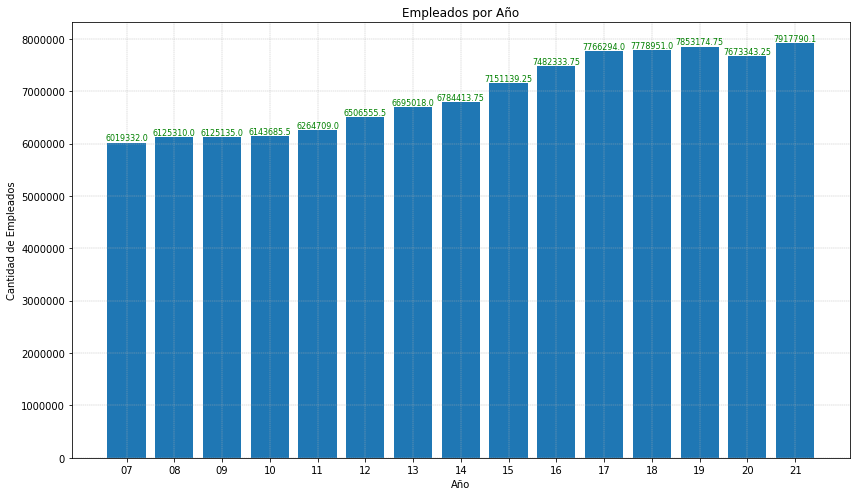

In [30]:
empleo = indicadores.query('Indicadores=="Empleo" ')
desempleo = indicadores.query('Indicadores=="Desempleo" ')

fig, ax = plt.subplots(figsize =(12, 7))
plt.bar( empleo["Periodo"],empleo["Total"])

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Empleados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Empleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(empleo["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', color='green', va='bottom')
plt.tight_layout()
plt.show()

<h2 style="color:yellowgreen">Personas con desempleo por año</h2>

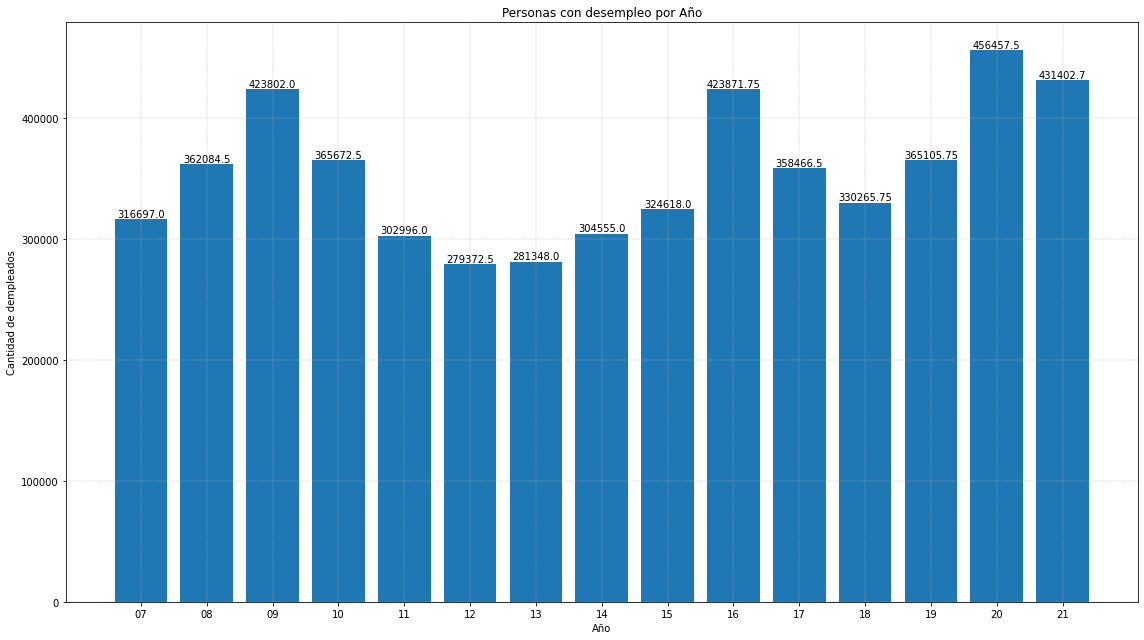

In [31]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(desempleo["Periodo"],desempleo["Total"])

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Personas con desempleo por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de dempleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(desempleo["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', va='bottom')
plt.tight_layout()
plt.show()

<h2 style="color:yellowgreen">Generar histogramas subempleo, empleo pleno y empleo no pleno por año</h2>

In [32]:
indicadores = dataPoblacion.query('Indicadores=="Subempleo" | Indicadores=="Empleo Adecuado/Pleno" | Indicadores=="Otro Empleo no pleno"')
indicadores

,Periodo,Indicadores,Total
6,07,Empleo Adecuado/Pleno,"2,737,158.00"
9,07,Otro Empleo no pleno,"1,504,000.00"
15,07,Subempleo,"1,155,872.00"
24,08,Empleo Adecuado/Pleno,"2,804,627.00"
27,08,Otro Empleo no pleno,"1,669,021.00"
33,08,Subempleo,"1,044,338.50"
42,09,Empleo Adecuado/Pleno,"2,565,691.00"
45,09,Otro Empleo no pleno,"1,778,578.00"
51,09,Subempleo,"1,071,615.00"
60,10,Empleo Adecuado/Pleno,"2,795,537.50"


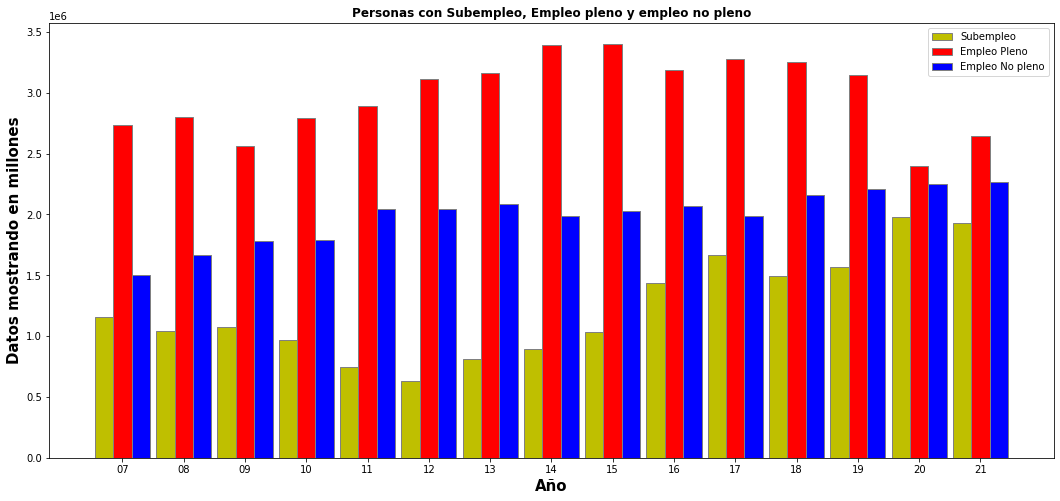

In [33]:
subEmpleo= indicadores.query('Indicadores=="Subempleo"')
empleoPleno= indicadores.query('Indicadores=="Empleo Adecuado/Pleno"')
empleoNopleno= indicadores.query('Indicadores=="Otro Empleo no pleno"')

barWidth = 0.3
fig = plt.subplots(figsize =(18, 8))
 
IT = np.array(subEmpleo["Total"])
ECE = np.array(empleoPleno["Total"])
CSE = np.array(empleoNopleno["Total"])
 
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, IT, color ='y', width = barWidth,
        edgecolor ='grey', label ='Subempleo')
plt.bar(br2, ECE, color ='r', width = barWidth,
        edgecolor ='grey', label ='Empleo Pleno')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Empleo No pleno')
 
plt.xlabel('Año', fontweight ='bold', fontsize = 15)
plt.ylabel('Datos mostrando en millones', fontweight ='bold', fontsize = 15)
plt.title('Personas con Subempleo, Empleo pleno y empleo no pleno',fontweight ='bold',)
plt.xticks([r + barWidth for r in range(len(IT))],
        np.array(empleoNopleno["Periodo"]))
 
plt.legend()
plt.show()

Generar un reporte parametrizado que permita ingresar los datos de las fechas inicio y fin para obtener la información de las graficas vistas en el primer punto

In [81]:
sectorizacion_empleo.rename(columns = {
'Unnamed: 1': 'Sector'}, inplace = True)

sectorizacion = sectorizacion_empleo[sectorizacion_empleo['Característica'].notna()]

In [82]:
sectorizacion = sectorizacion.drop(sectorizacion.columns[[0,1]], axis=1)

In [83]:
idx=0
sectorizacion.insert(loc=idx, column='Fecha', value=['Nacional', 'Urbano','Rural'])
sectorizacion

,Fecha,jun-07,sep-07,dic-07,mar-08,jun-08,sep-08,dic-08,mar-09,jun-09,sep-09,dic-09,mar-10,jun-10,sep-10,dic-10,mar-11,jun-11,sep-11,dic-11,mar-12,jun-12,sep-12,dic-12,mar-13,jun-13,sep-13,dic-13,mar-14,jun-14,sep-14,dic-14,mar15,jun-15,sep-15,dic-15,mar-16,jun-16,sep-16,dic-16,mar-17,jun-17,sep-17,dic-17,mar-18,jun-18,sep-18,dic-18,mar-19,jun-19,sep-19,dic-19,sep-20,oct-20,nov-20,dic-20,ene-21,feb-21,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21
0,Nacional,-,-,"41,0%",-,"42,5%",-,"43,9%",-,-,-,"43,7%",-,"44,9%",-,"47,2%",-,"46,3%",-,"46,5%",-,"47,4%",-,"48,7%",-,"47,6%",-,"49,3%","48,7%","50,9%","51,2%","50,9%","49,9%","51,2%","50,6%","50,5%","48,7%","49,0%","47,7%","47,6%","47,0%","47,9%","47,4%","48,9%","48,3%","46,0%","46,8%","46,2%","45,7%","45,9%","46,5%","44,7%","41,6%","42,6%","41,0%","40,9%","41,9%","41,4%","42,1%","39,9%","39,7%","42,3%","40,6%","41,2%","43,9%","41,4%"
4,Urbano,"54,7%","55,7%","54,1%","54,4%","55,8%","56,0%","56,2%","57,4%","57,7%","59,4%","57,3%","57,5%","58,6%","59,4%","60,8%","59,9%","60,5%","61,0%","59,9%","63,1%","61,6%","61,6%","62,5%","61,2%","61,9%","62,0%","61,9%","61,0%","63,0%","63,6%","60,6%","61,3%","62,6%","61,0%","60,8%","59,6%","60,4%","58,2%","56,6%","57,9%","58,7%","57,3%","59,2%","59,0%","57,5%","58,8%","57,3%","57,4%","56,9%","57,3%","56,3%","51,8%","53,5%","52,8%","51,2%","53,7%","51,9%","51,3%","50,9%","50,7%","52,5%","50,7%","52,1%","54,3%","52,5%"
8,Rural,-,-,"15,5%",-,"16,2%",-,"19,1%",-,-,-,"17,2%",-,"18,4%",-,"20,5%",-,"18,9%",-,"19,6%",-,"19,9%",-,"21,2%",-,"20,9%",-,"23,6%","23,4%","25,2%","25,2%","31,0%","28,5%","28,9%","29,8%","28,7%","27,5%","27,1%","27,6%","29,6%","26,7%","27,0%","28,0%","28,1%","27,7%","24,2%","23,4%","24,4%","23,7%","25,3%","25,8%","22,3%","22,9%","22,5%","19,7%","21,4%","20,8%","22,1%","25,2%","20,2%","19,9%","23,1%","21,2%","21,0%","24,9%","20,4%"


In [84]:
nDfSecto = sectorizacion.T
nDfSecto.columns = nDfSecto.iloc[0]
sectoDF = nDfSecto.replace('-', 0)
sectoDF.head()

Fecha,Nacional,Urbano,Rural
Fecha,Nacional,Urbano,Rural
jun-07,0,"54,7%",0
sep-07,0,"55,7%",0
dic-07,"41,0%","54,1%","15,5%"
mar-08,0,"54,4%",0


In [85]:
sectoDF.columns = sectoDF.iloc[0]
poblacion.head(5)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018


In [86]:
subempleo = poblacion.loc[poblacion['Indicadores'] == 'Empleo No Pleno' ]
subempleo.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer


In [87]:
subempleoF = poblacion.loc[poblacion['Indicadores'] == 'Subempleo']
subempleoF.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
6,ENEMDU,dic-07,Subempleo,1.155.872,687.714,468.158,679.118,476.753
24,ENEMDU,jun-08,Subempleo,1.130.699,696.949,433.750,665.939,464.760
42,ENEMDU,dic-08,Subempleo,957.978,588.824,369.155,549.097,408.881
60,ENEMDU,dic-09,Subempleo,1.071.615,664.855,406.760,636.204,435.411
78,ENEMDU,jun-10,Subempleo,1.041.266,663.688,377.578,596.889,444.377


In [88]:
empleoPleno = poblacion.loc[poblacion['Indicadores'] == 'Empleo Adecuado/Pleno']
empleoPleno.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
5,ENEMDU,dic-07,Empleo Adecuado/Pleno,2.737.158,2.236.440,500.719,1.907.451,829.707
23,ENEMDU,jun-08,Empleo Adecuado/Pleno,2.750.595,2.248.018,502.577,1.937.602,812.993
41,ENEMDU,dic-08,Empleo Adecuado/Pleno,2.858.659,2.339.288,519.370,1.991.157,867.502
59,ENEMDU,dic-09,Empleo Adecuado/Pleno,2.565.691,2.100.511,465.180,1.765.402,800.289
77,ENEMDU,jun-10,Empleo Adecuado/Pleno,2.715.542,2.211.148,504.394,1.839.160,876.383


In [89]:
# Ver todas las ocurrencias de 'No pleno' en la columna de indicadores
empleonoPleno = poblacion.loc[poblacion['Indicadores'] == 'Otro Empleo no pleno']
empleonoPleno.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
10,ENEMDU,dic-07,Otro Empleo no pleno,1.504.000,785.461,718.539,830.341,673.659
28,ENEMDU,jun-08,Otro Empleo no pleno,1.688.693,909.254,779.439,898.349,790.344
46,ENEMDU,dic-08,Otro Empleo no pleno,1.649.349,859.126,790.223,923.415,725.935
64,ENEMDU,dic-09,Otro Empleo no pleno,1.778.578,951.354,827.224,1.023.151,755.428
82,ENEMDU,jun-10,Otro Empleo no pleno,1.811.893,958.283,853.610,1.057.750,754.142


SUBEMPLEO

In [90]:
subEmpDF = subempleoF[['Periodo', 'Total']]
subEmpDF.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Subempleo'}, inplace = True)

EMPLEO ADECUADO

In [91]:
empAdeDF = empleoPleno [['Periodo', 'Total']]
empAdeDF.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Adecuado'}, inplace = True)

NO PLENO

In [92]:
noPlenoDF = empleonoPleno[['Periodo', 'Total']]
noPlenoDF.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'No_pleno'}, inplace = True)

Transformar de string a int los valores de total de Subempleo, empleo adecuado y empleo no pleno 

In [93]:
subEmpDF['Subempleo'] = subEmpDF['Subempleo'].str.replace('.','').astype(int)
subEmpDF.head()

,Fecha,Subempleo
6,dic-07,1155872
24,jun-08,1130699
42,dic-08,957978
60,dic-09,1071615
78,jun-10,1041266


In [94]:
empAdeDF['Adecuado'] = empAdeDF['Adecuado'].str.replace('.','').astype(int)
empAdeDF.head()

,Fecha,Adecuado
5,dic-07,2737158
23,jun-08,2750595
41,dic-08,2858659
59,dic-09,2565691
77,jun-10,2715542


In [95]:
noPlenoDF['No_pleno'] = noPlenoDF['No_pleno'].str.replace('.','').astype(int)
noPlenoDF.head()

,Fecha,No_pleno
10,dic-07,1504000
28,jun-08,1688693
46,dic-08,1649349
64,dic-09,1778578
82,jun-10,1811893


In [96]:
resMerge = pd.merge(subEmpDF, empAdeDF, on=['Fecha'])
resMerge.head()

,Fecha,Subempleo,Adecuado
0,dic-07,1155872,2737158
1,jun-08,1130699,2750595
2,dic-08,957978,2858659
3,dic-09,1071615,2565691
4,jun-10,1041266,2715542


In [97]:
finMerge = pd.merge(resMerge, noPlenoDF, on=['Fecha'])
finMerge.head()

,Fecha,Subempleo,Adecuado,No_pleno
0,dic-07,1155872,2737158,1504000
1,jun-08,1130699,2750595,1688693
2,dic-08,957978,2858659,1649349
3,dic-09,1071615,2565691,1778578
4,jun-10,1041266,2715542,1811893


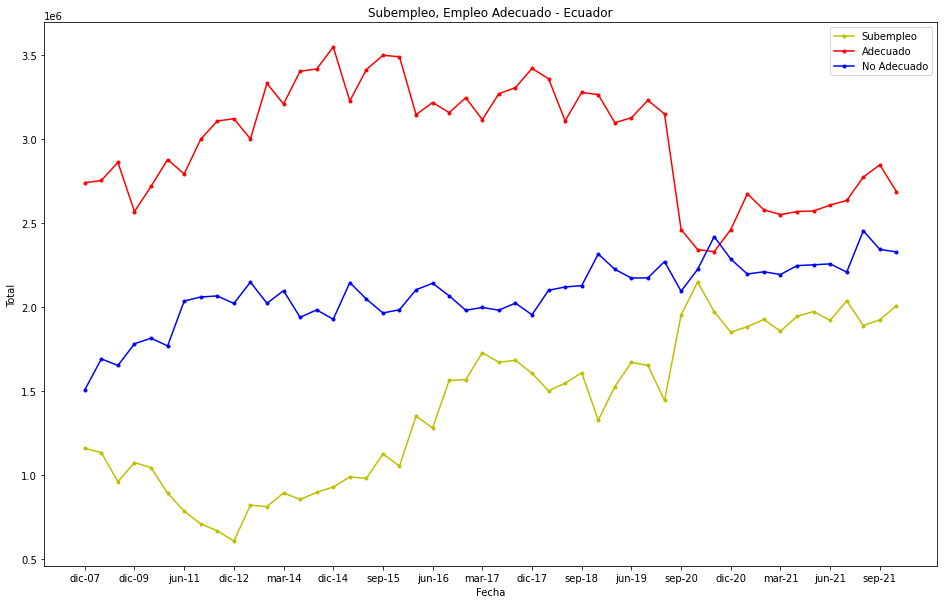

In [98]:
plt.figure(figsize=(16, 10))
plt.title('Subempleo, Empleo Adecuado - Ecuador')
plt.plot(finMerge.Fecha, finMerge.Subempleo, 'y.-')
plt.plot(finMerge.Fecha, finMerge.Adecuado, 'r.-')
plt.plot(finMerge.Fecha, finMerge.No_pleno, 'b.-')
plt.xticks(finMerge.Fecha[::3].tolist())
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.legend(['Subempleo','Adecuado', 'No Adecuado'])
plt.show()

CONCLUSIÓN

*   Despues de realizar el analisis de los datos de personas con empleo y sin empleo, se pudo notar el gran cambio en graficas que nos representas el aumento de desempleo.

RECOMENDACIONES

*  Transformar los datos, limpiar el dataset y revisar material de apoyo brindado por el docente.

REFERENCIAS:

- Dataset
https://www.ecuadorencifras.gob.ec/estadisticas-laborales-octubre-2021/





